In [ ]:
# Step 1: Install required packages
!pip install -q kaggle torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.5 MB/s eta 0:00:00


In [ ]:
# Step 2: Set up Kaggle API
from google.colab import files
files.upload()  # Upload your kaggle.json file here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Step 4: Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import os

In [ ]:
 #Step 3: Download dataset
!kaggle datasets download -d kushagratandon12/diabetic-retinopathy-balanced
!unzip -q diabetic-retinopathy-balanced.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/kushagratandon12/diabetic-retinopathy-balanced
License(s): CC0-1.0
100% 1.90G/1.90G [01:26<00:00, 24.0MB/s]
100% 1.90G/1.90G [01:26<00:00, 23.6MB/s]


In [ ]:
# Step 6: Dataset setup
data_dir = "/content/dataset/Diabetic_Balanced_Data"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

In [ ]:
# Step 6: Correct dataset setup
data_dir = "/content/dataset/content/Diabetic_Balanced_Data"  # Changed path
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

# Verify paths exist
print("Checking directories:")
print("Train exists:", os.path.exists(train_dir))
print("Val exists:", os.path.exists(val_dir))
print("Test exists:", os.path.exists(test_dir))

# Only proceed if all return True

Checking directories:
Train exists: True
Val exists: True
Test exists: True


In [ ]:
!ls -lR /content/dataset/content/Diabetic_Balanced_Data

Streaming output truncated to the last 5000 lines.
-rw-r--r-- 1 root root  63737 May 14  2021 30567_right.jpeg
-rw-r--r-- 1 root root  20615 May 14  2021 30597_left._aug_28.jpeg
-rw-r--r-- 1 root root  68291 May 14  2021 30597_left.jpeg
-rw-r--r-- 1 root root  59793 May 14  2021 3059_left.jpeg
-rw-r--r-- 1 root root  21156 May 14  2021 3070_right._aug_3.jpeg
-rw-r--r-- 1 root root 103023 May 14  2021 30717_right.jpeg
-rw-r--r-- 1 root root 102582 May 14  2021 3074_left.jpeg
-rw-r--r-- 1 root root  79510 May 14  2021 30782_right.jpeg
-rw-r--r-- 1 root root  75957 May 14  2021 30787_left.jpeg
-rw-r--r-- 1 root root  22806 May 14  2021 30868_right._aug_8.jpeg
-rw-r--r-- 1 root root  81048 May 14  2021 30868_right.jpeg
-rw-r--r-- 1 root root  20245 May 14  2021 30884_right._aug_27.jpeg
-rw-r--r-- 1 root root  62556 May 14  2021 30899_left.jpeg
-rw-r--r-- 1 root root  17894 May 14  2021 30899_right._aug_2.jpeg
-rw-r--r-- 1 root root  25169 May 14  2021 30909_right._aug_1.jpeg
-rw-r--r-- 1 r

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, WeightedRandomSampler
import matplotlib.pyplot as plt
import time
import os
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau
import gc  # Garbage collector for memory management

# Enable garbage collection
gc.enable()


In [ ]:
# Memory management helper function
def free_memory():
    gc.collect()
    torch.cuda.empty_cache()

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset setup
data_dir = "/content/dataset/content/Diabetic_Balanced_Data"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")


Using device: cuda


In [ ]:
# Verify paths exist
print("Checking directories:")
print("Train exists:", os.path.exists(train_dir))
print("Val exists:", os.path.exists(val_dir))
print("Test exists:", os.path.exists(test_dir))


Checking directories:
Train exists: True
Val exists: True
Test exists: True


In [ ]:
# Enhanced data augmentation tailored for retinal images
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),  # Retinal images benefit from vertical flips too
    transforms.RandomRotation(20),  # Increased rotation range
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1),  # Enhanced for retinal images
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),  # Helps with slight variations
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Test transform with normalization
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
# Create datasets
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
val_data = datasets.ImageFolder(val_dir, transform=test_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# Batch size optimized for Colab's memory constraints
batch_size = 16  # Smaller batch size for more stable updates

# Create dataloaders - keeping basic loaders for now
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

NameError: name 'datasets' is not defined

In [ ]:
# Print class distribution
print("Class names:", train_data.classes)
class_counts = [0] * len(train_data.classes)
for _, label in train_data.samples:
    class_counts[label] += 1
print("Class distribution in training set:", class_counts)

Class names: ['0', '1', '2', '3', '4']
Class distribution in training set: [7000, 6792, 7000, 7000, 7000]


In [ ]:
# Utilize EfficientNet for better performance/size ratio
try:
    # EfficientNet is more efficient for the same accuracy level
    model = models.efficientnet_b2(pretrained=True)

    # Modify classifier head
    num_ftrs = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(num_ftrs, 5)
    )
except:
    # Fallback to ResNet if EfficientNet is not available
    print("EfficientNet not available, using ResNet34 instead")
    model = models.resnet34(pretrained=True)

    # Freeze early layers to prevent overfitting
    for param in list(model.parameters())[:-30]:  # Freeze more aggressively
        param.requires_grad = False

    num_ftrs = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Dropout(0.4),
        nn.Linear(num_ftrs, 5)
    )

model = model.to(device)
free_memory()  # Clear memory after model initialization


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 165MB/s]


In [ ]:
# Using focal loss to focus on difficult examples (Mild, Moderate classes)
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.alpha is not None:
            alpha_weight = self.alpha[targets.data]
            focal_loss = alpha_weight * focal_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        return focal_loss.sum()

# Setting focal loss with class weights to help with the problematic classes
# Focus more on Mild and Moderate classes which had lower performance
alpha = torch.tensor([0.8, 1.2, 1.3, 0.7, 0.9]).to(device)  # Higher weight for Mild and Moderate
criterion = FocalLoss(gamma=2.0, alpha=alpha)


In [ ]:
# Optimizer with weight decay and discriminative learning rates
def get_optimizer(model):
    # Group parameters: classifier gets higher learning rate
    classifier_params = [p for n, p in model.named_parameters() if 'classifier' in n or 'fc' in n]
    base_params = [p for n, p in model.named_parameters() if 'classifier' not in n and 'fc' not in n and p.requires_grad]

    optimizer = optim.AdamW([
        {'params': base_params, 'lr': 0.0001, 'weight_decay': 1e-5},
        {'params': classifier_params, 'lr': 0.001, 'weight_decay': 1e-4}
    ])
    return optimizer

optimizer = get_optimizer(model)

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
# Mixup data augmentation to improve generalization
def mixup_data(x, y, alpha=0.2):
    '''Applies mixup augmentation to the batch'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Training function with mixup and optimization
def train_model(model, criterion, optimizer, scheduler, max_epochs=20, patience=4):
    best_acc = 0.0
    best_f1 = 0.0
    start_time = time.time()
    no_improve_epochs = 0

    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    print(f"Starting training for {max_epochs} epochs...")

    for epoch in range(max_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Apply mixup augmentation 70% of the time
            if np.random.random() < 0.7:
                images, labels_a, labels_b, lam = mixup_data(images, labels)

                optimizer.zero_grad()
                outputs = model(images)
                loss = mixup_criterion(criterion, outputs, labels_a, labels_b, lam)
            else:
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)

            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()

            running_loss += loss.item() * images.size(0)

            # Calculate accuracy for non-mixup batches
            if np.random.random() >= 0.7:
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_data)
        history['train_loss'].append(epoch_loss)

        # Clear memory before validation
        free_memory()

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        all_preds = []
        all_labels = []

        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_epoch_loss = val_loss / len(val_data)
        val_acc = 100 * val_correct / val_total
        history['val_loss'].append(val_epoch_loss)
        history['val_acc'].append(val_acc)

        # Calculate F1 score
        from sklearn.metrics import f1_score
        val_f1 = f1_score(all_labels, all_preds, average='macro') * 100
        history['val_f1'].append(val_f1)

        # Update learning rate
        scheduler.step(val_acc)

        # Print progress
        print(f"Epoch {epoch+1}/{max_epochs} | "
              f"Train Loss: {epoch_loss:.4f} | "
              f"Val Loss: {val_epoch_loss:.4f} | "
              f"Val Acc: {val_acc:.2f}% | "
              f"Val F1: {val_f1:.2f}%")

        # Save the best model by F1 score (better for imbalanced performance)
        if val_f1 > best_f1:
            print(f"Validation F1 improved from {best_f1:.2f}% to {val_f1:.2f}%. Saving model...")
            best_f1 = val_f1
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_dr_model.pth')
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
            print(f"No improvement in validation F1. {patience-no_improve_epochs} epochs left until early stopping.")

        # Early stopping
        if no_improve_epochs >= patience:
            print(f"Early stopping triggered. No improvement for {patience} epochs.")
            break

        # Also stop if we reach target accuracy and F1 score
        if val_acc >= 89 and val_f1 >= 88:
            print(f"Reached target metrics: Accuracy {val_acc:.2f}%, F1 Score {val_f1:.2f}%")
            break

        # Clear memory after each epoch
        free_memory()

    training_time = (time.time() - start_time) / 60
    print(f"Training completed in {training_time:.2f} minutes")
    print(f"Best validation accuracy: {best_acc:.2f}%, Best F1 score: {best_f1:.2f}%")

    # Load best model
    model.load_state_dict(torch.load('best_dr_model.pth'))

    # Plot training history
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history['train_loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history['val_acc'])
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')

    plt.subplot(1, 3, 3)
    plt.plot(history['val_f1'])
    plt.title('Validation F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score (%)')

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

    return model


Starting training process...
Starting training for 20 epochs...
Epoch 1/20 | Train Loss: 0.6382 | Val Loss: 0.4371 | Val Acc: 58.58% | Val F1: 58.01%
Validation F1 improved from 0.00% to 58.01%. Saving model...
Epoch 2/20 | Train Loss: 0.5631 | Val Loss: 0.4080 | Val Acc: 63.86% | Val F1: 64.00%
Validation F1 improved from 58.01% to 64.00%. Saving model...
Epoch 3/20 | Train Loss: 0.5213 | Val Loss: 0.3866 | Val Acc: 63.93% | Val F1: 63.45%
No improvement in validation F1. 3 epochs left until early stopping.
Epoch 4/20 | Train Loss: 0.4907 | Val Loss: 0.3373 | Val Acc: 68.76% | Val F1: 68.87%
Validation F1 improved from 64.00% to 68.87%. Saving model...
Epoch 5/20 | Train Loss: 0.4638 | Val Loss: 0.3202 | Val Acc: 69.81% | Val F1: 69.90%
Validation F1 improved from 68.87% to 69.90%. Saving model...
Epoch 6/20 | Train Loss: 0.4562 | Val Loss: 0.3036 | Val Acc: 71.11% | Val F1: 71.50%
Validation F1 improved from 69.90% to 71.50%. Saving model...
Epoch 7/20 | Train Loss: 0.4289 | Val Loss

<ipython-input-19-9f0f775118c1>:148: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_dr_model.pth'))


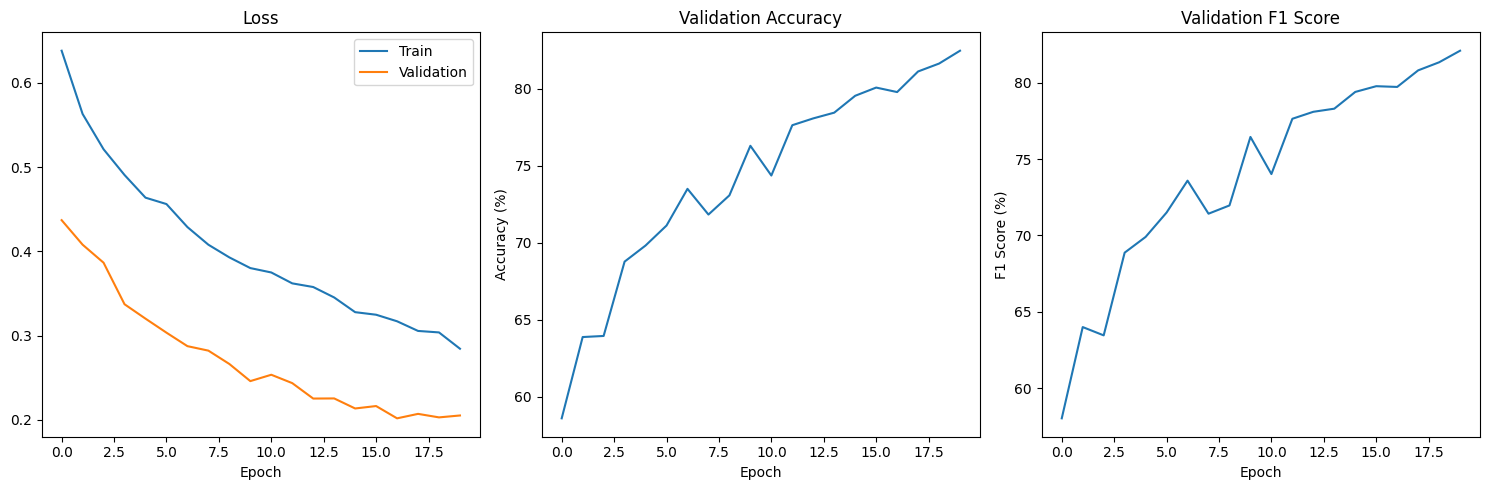

In [ ]:
# Train model with early stopping
print("Starting training process...")
model = train_model(model, criterion, optimizer, scheduler, max_epochs=20, patience=4)

In [ ]:
# Final test evaluation with detailed metrics
def evaluate_model(model, dataloader, classes=['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative']):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

    # Calculate and print accuracy
    accuracy = accuracy_score(all_labels, all_preds) * 100
    print(f"\nTest Accuracy: {accuracy:.2f}%")

    # Calculate and print F1 score
    f1 = f1_score(all_labels, all_preds, average='macro') * 100
    print(f"Test F1 Score (macro): {f1:.2f}%")

    # Detailed classification report
    print("\nClassification Report:")
    report = classification_report(all_labels, all_preds, target_names=classes)
    print(report)

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Label with counts
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()

    return accuracy, f1, report


Evaluating model on test set...

Test Accuracy: 82.04%
Test F1 Score (macro): 81.68%

Classification Report:
               precision    recall  f1-score   support

        No DR       0.72      0.57      0.64      1000
         Mild       0.73      0.79      0.76       971
     Moderate       0.70      0.76      0.73      1000
       Severe       0.95      0.98      0.96      1000
Proliferative       0.98      1.00      0.99      1000

     accuracy                           0.82      4971
    macro avg       0.82      0.82      0.82      4971
 weighted avg       0.82      0.82      0.82      4971



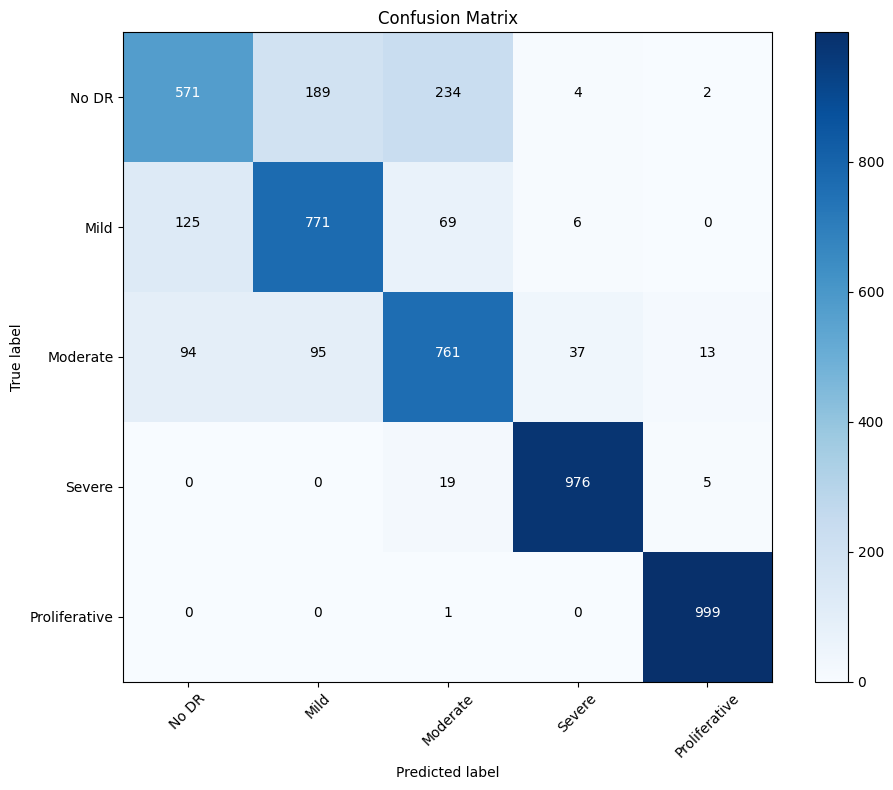

In [ ]:
# Evaluate model on test set
print("Evaluating model on test set...")
test_accuracy, test_f1, test_report = evaluate_model(model, test_loader)


In [ ]:
# Save final model
torch.save({
    'model_state_dict': model.state_dict(),
    'test_accuracy': test_accuracy,
    'test_f1': test_f1,
    'test_report': test_report
}, 'final_dr_model.pth')

print(f"Final model saved with test accuracy: {test_accuracy:.2f}% and F1 score: {test_f1:.2f}%")

Final model saved with test accuracy: 82.04% and F1 score: 81.68%


In [ ]:
from google.colab import files

# Download the best model
files.download('best_dr_model.pth')

# Or download the final model with metrics
files.download('final_dr_model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Download the confusion matrix image
files.download('confusion_matrix.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import cv2

# Grad-CAM implementation
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()

        # Register the hooks
        target_layer.register_forward_hook(forward_hook)
        target_layer.register_full_backward_hook(backward_hook)

    def forward(self, x):
        return self.model(x)

    def generate_cam(self, input_image, target_class=None):
        # Forward pass
        model_output = self.forward(input_image)

        if target_class is None:
            target_class = torch.argmax(model_output, dim=1).item()

        # Zero gradients
        self.model.zero_grad()

        # Target for backprop
        one_hot = torch.zeros_like(model_output)
        one_hot[0, target_class] = 1

        # Backward pass
        model_output.backward(gradient=one_hot, retain_graph=True)

        # Generate CAM
        weights = torch.mean(self.gradients, dim=(2, 3), keepdim=True)
        cam = torch.sum(weights * self.activations, dim=1, keepdim=True)

        # Apply ReLU to focus on features that have a positive influence
        cam = F.relu(cam)

        # Normalize CAM
        cam = F.interpolate(cam, size=input_image.shape[2:], mode='bilinear', align_corners=False)
        cam = cam[0, 0].cpu().numpy()
        cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)

        return cam, target_class

# Function to apply Grad-CAM and visualize results
def apply_gradcam(model, image_path, preprocess, device, class_names):
    # Set model to evaluation mode
    model.eval()

    # Load image
    img = Image.open(image_path).convert('RGB')
    input_tensor = preprocess(img).unsqueeze(0).to(device)

    # Get model prediction
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = F.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)

    # Identify the target layer for Grad-CAM
    # This will depend on your model architecture
    # For example, for ResNet models:
    try:
        target_layer = model.layer4[-1]  # For ResNet
    except AttributeError:
        try:
            target_layer = model.features[-1]  # For VGG-like models
        except AttributeError:
            # For other architectures, you might need to find the final convolutional layer
            print("Please specify the target layer for your model architecture.")
            return None, None, None

    # Initialize Grad-CAM
    grad_cam = GradCAM(model, target_layer)

    # Generate heatmap
    heatmap, _ = grad_cam.generate_cam(input_tensor, predicted_class.item())

    # Convert original image to numpy array for visualization
    orig_img = np.array(img)

    # Resize heatmap to match original image size
    heatmap_resized = cv2.resize(heatmap, (orig_img.shape[1], orig_img.shape[0]))

    # Create colormap
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

    # Overlay heatmap on original image
    superimposed = heatmap_colored * 0.4 + orig_img * 0.6
    superimposed = np.clip(superimposed, 0, 255).astype(np.uint8)

    # Create visualization
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(orig_img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(heatmap_resized, cmap='jet')
    ax[1].set_title('Grad-CAM Heatmap')
    ax[1].axis('off')

    ax[2].imshow(superimposed)
    ax[2].set_title(f'Prediction: {class_names[predicted_class.item()]}\nConfidence: {confidence.item():.2f}')
    ax[2].axis('off')

    plt.tight_layout()
    plt.savefig('gradcam_visualization.png')
    plt.show()

    return predicted_class.item(), confidence.item(), heatmap_resized

# Function to test model robustness with various image transformations
def test_model_robustness(model, image_path, preprocess, device, class_names):
    # Set model to evaluation mode
    model.eval()

    # Load original image
    original_img = Image.open(image_path).convert('RGB')
    original_tensor = preprocess(original_img).unsqueeze(0).to(device)

    # Get original prediction
    with torch.no_grad():
        output = model(original_tensor)
        probs = F.softmax(output, dim=1)
        confidence, original_pred = torch.max(probs, 1)

    # Define transformations to test robustness
    transformations = {
        'Original': transforms.Compose([preprocess]),
        'Brightness +50%': transforms.Compose([
            transforms.ColorJitter(brightness=0.5),
            preprocess
        ]),
        'Brightness -50%': transforms.Compose([
            transforms.ColorJitter(brightness=(0.5, 0.5)),
            preprocess
        ]),
        'Contrast +50%': transforms.Compose([
            transforms.ColorJitter(contrast=1.5),
            preprocess
        ]),
        'Rotation 30°': transforms.Compose([
            transforms.RandomRotation(degrees=(30, 30)),
            preprocess
        ]),
        'Horizontal Flip': transforms.Compose([
            transforms.RandomHorizontalFlip(p=1.0),
            preprocess
        ]),
        'Gaussian Noise': None,  # Will be handled separately
        'Gaussian Blur': transforms.Compose([
            transforms.GaussianBlur(kernel_size=5, sigma=2),
            preprocess
        ])
    }

    # Prepare results
    results = {}
    transformed_images = {}

    # Test each transformation
    for name, transform in transformations.items():
        if name == 'Gaussian Noise':
            # Apply normal preprocessing
            img_tensor = preprocess(original_img).unsqueeze(0).to(device)
            # Add Gaussian noise
            noise = torch.randn_like(img_tensor) * 0.1
            img_tensor = img_tensor + noise
            img_tensor = torch.clamp(img_tensor, 0, 1)

            # Save transformed image for display
            noise_img = img_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
            noise_img = np.clip(noise_img, 0, 1)
            transformed_images[name] = noise_img
        else:
            # Apply transformation
            transformed_img = original_img.copy()
            img_tensor = transform(transformed_img).unsqueeze(0).to(device)

            # Save transformed image for display (need to denormalize)
            if name == 'Original':
                # For display purposes, we need the image without normalization
                display_transform = transforms.Compose([
                    transforms.Resize((224, 224)),
                    transforms.ToTensor()
                ])
                img_for_display = display_transform(transformed_img).permute(1, 2, 0).cpu().numpy()
            else:
                # For other transformations, we need to get it before normalization
                # This is a simplification and might need adjustment based on your preprocessing
                img_for_display = transforms.Compose([
                    transforms.Resize((224, 224)),
                    transforms.ToTensor()
                ])(transformed_img).permute(1, 2, 0).cpu().numpy()

            transformed_images[name] = img_for_display

        # Get prediction
        with torch.no_grad():
            output = model(img_tensor)
            probs = F.softmax(output, dim=1)
            conf, pred = torch.max(probs, 1)

            # Extract top-3 predictions
            top3_conf, top3_pred = torch.topk(probs, 3, dim=1)

            top3_results = []
            for i in range(3):
                cls = top3_pred[0, i].item()
                cf = top3_conf[0, i].item()
                top3_results.append((cls, cf))

        # Save results
        results[name] = {
            'prediction': pred.item(),
            'confidence': conf.item(),
            'top3': top3_results,
            'match_original': pred.item() == original_pred.item()
        }

    # Visualize results
    plt.figure(figsize=(15, len(transformations) * 4))

    for i, (name, img) in enumerate(transformed_images.items()):
        plt.subplot(len(transformations), 3, i*3 + 1)
        plt.imshow(img)
        plt.title(name)
        plt.axis('off')

        plt.subplot(len(transformations), 3, i*3 + 2)
        result = results[name]
        pred_class = class_names[result['prediction']]
        confidence = result['confidence']
        match = "✓" if result['match_original'] else "✗"
        plt.text(0.5, 0.5, f"Prediction: {pred_class}\nConfidence: {confidence:.2f}\nMatch: {match}",
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
        plt.axis('off')

        plt.subplot(len(transformations), 3, i*3 + 3)
        top3 = result['top3']
        text = "Top 3 Predictions:\n"
        for cls, cf in top3:
            text += f"{class_names[cls]}: {cf:.2f}\n"
        plt.text(0.5, 0.5, text, horizontalalignment='center', verticalalignment='center', fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('robustness_test.png')
    plt.show()

    # Calculate aggregate statistics
    match_rate = sum(1 for r in results.values() if r['match_original']) / len(results)
    avg_confidence = sum(r['confidence'] for r in results.values()) / len(results)

    print(f"Robustness Summary:")
    print(f"- Match rate with original prediction: {match_rate:.2f} ({int(match_rate * 100)}%)")
    print(f"- Average confidence: {avg_confidence:.2f}")

    # Check for potential biases (simple check - does model heavily favor certain classes?)
    class_counts = {}
    for r in results.values():
        pred = r['prediction']
        class_counts[pred] = class_counts.get(pred, 0) + 1

    print("\nClass distribution in robustness tests:")
    for cls, count in class_counts.items():
        print(f"- {class_names[cls]}: {count} predictions ({count/len(results):.2f})")

    return results

# Function to analyze potential biases by looking at confusion matrix and class-wise metrics
def analyze_model_bias(model, data_loader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    class_correct = [0] * len(class_names)
    class_total = [0] * len(class_names)

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Calculate per-class accuracy
            for i in range(len(preds)):
                label = labels[i]
                class_total[label] += 1
                if preds[i] == label:
                    class_correct[label] += 1

    # Calculate confusion matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(all_labels, all_preds)

    # Normalize confusion matrix by row (true labels)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Normalized Confusion Matrix')
    plt.savefig('confusion_matrix.png')
    plt.show()

    # Calculate and display per-class metrics
    print("\nPer-class accuracy:")
    for i in range(len(class_names)):
        accuracy = class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f"- {class_names[i]}: {accuracy:.4f} ({class_correct[i]}/{class_total[i]})")

    # Calculate overall class imbalance
    class_distribution = [count/sum(class_total) for count in class_total]
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, class_distribution)
    plt.title('Class Distribution in Test Set')
    plt.ylabel('Proportion')
    plt.ylim(0, max(class_distribution) * 1.2)

    # Add value labels on top of bars
    for i, v in enumerate(class_distribution):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

    plt.savefig('class_distribution.png')
    plt.show()

    # Look for systematic biases (large differences between confusion matrix rows/columns)
    bias_analysis = {}

    # Check if model systematically confuses certain classes
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j and cm_normalized[i, j] > 0.2:  # Threshold for noticeable confusion
                bias_analysis[f"{class_names[i]}→{class_names[j]}"] = cm_normalized[i, j]

    if bias_analysis:
        print("\nPotential systematic confusions (threshold > 0.2):")
        for confusion, rate in sorted(bias_analysis.items(), key=lambda x: x[1], reverse=True):
            print(f"- {confusion}: {rate:.4f}")
    else:
        print("\nNo major systematic confusions detected (threshold > 0.2)")

    return {
        'confusion_matrix': cm,
        'normalized_cm': cm_normalized,
        'class_accuracy': [class_correct[i] / class_total[i] if class_total[i] > 0 else 0 for i in range(len(class_names))],
        'class_distribution': class_distribution,
        'systematic_biases': bias_analysis
    }

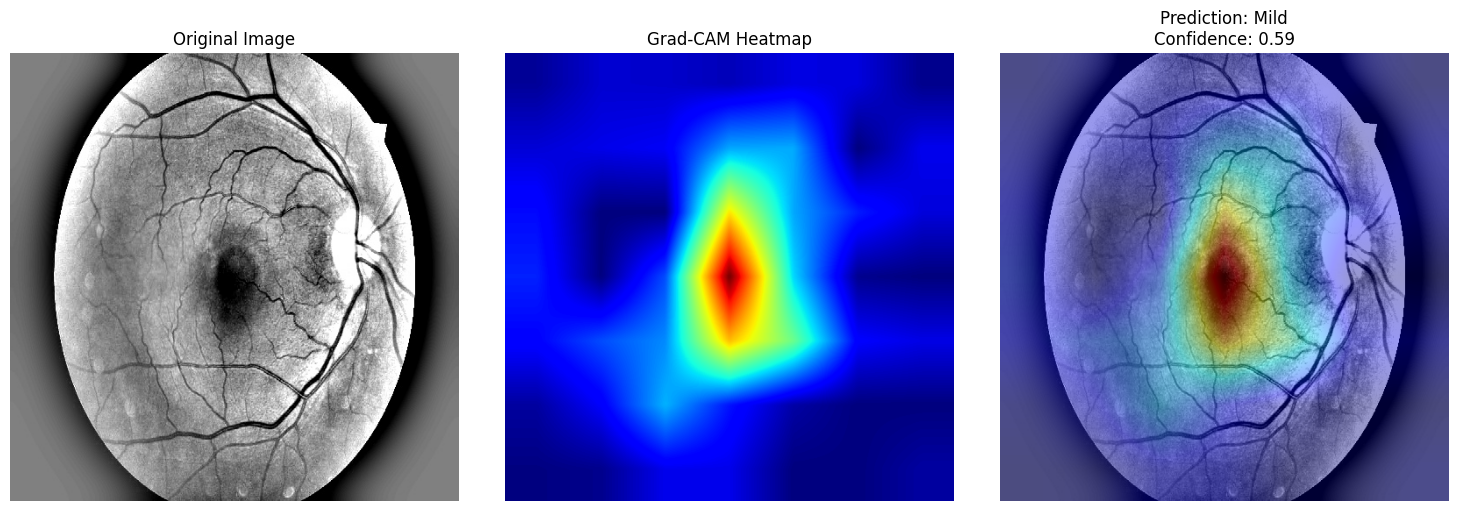

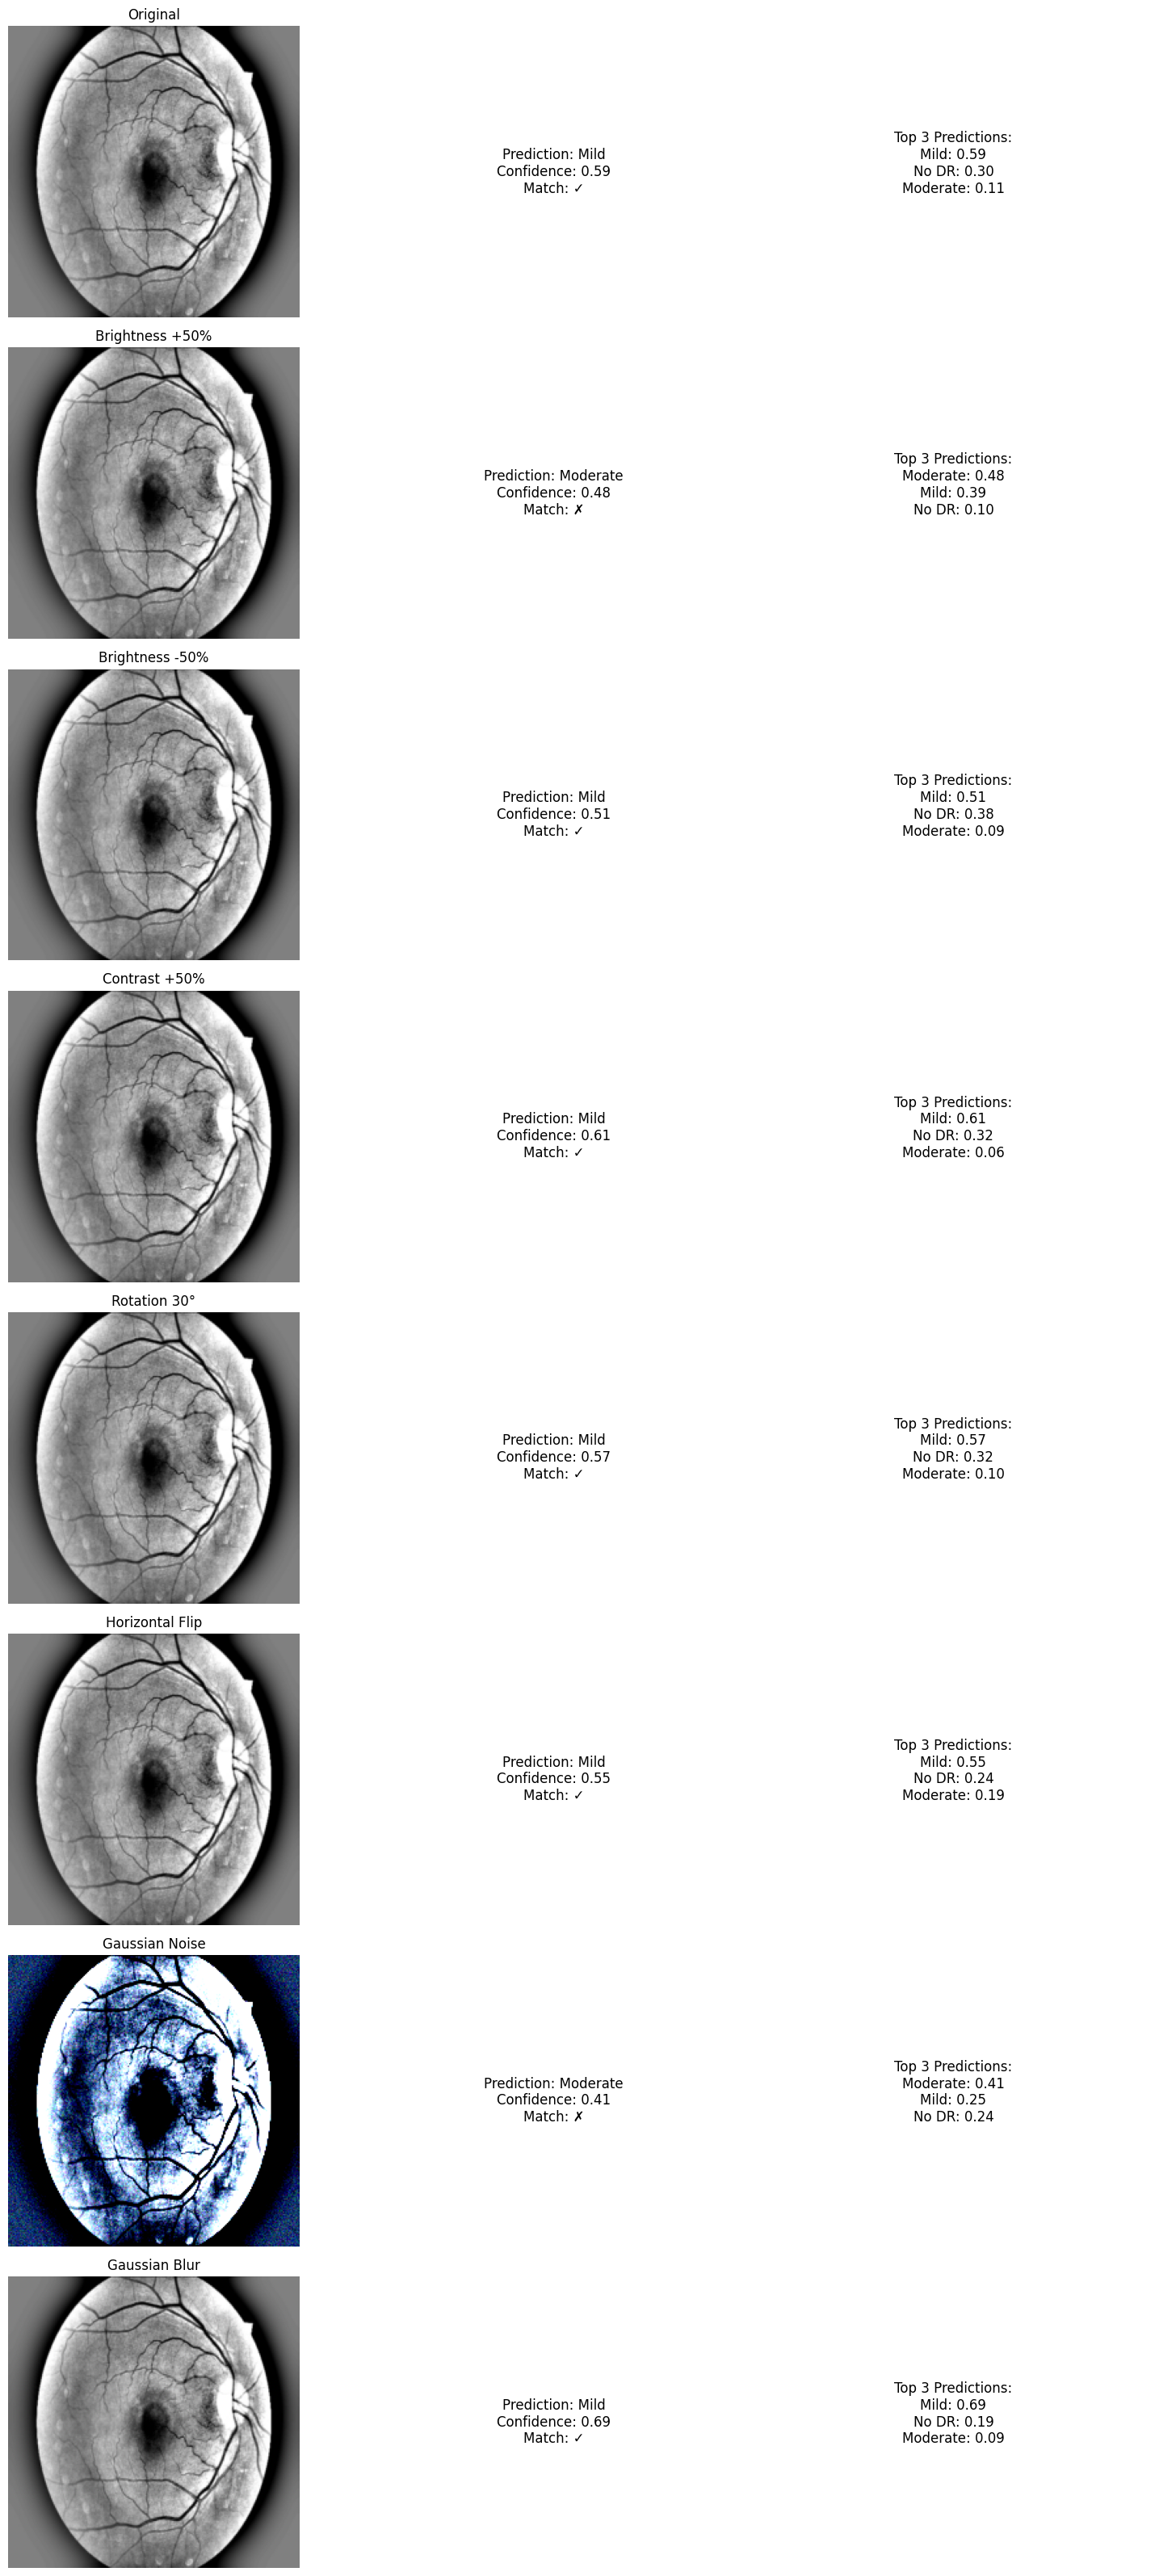

Robustness Summary:
- Match rate with original prediction: 0.75 (75%)
- Average confidence: 0.55

Class distribution in robustness tests:
- Mild: 6 predictions (0.75)
- Moderate: 2 predictions (0.25)


<Figure size 1000x800 with 0 Axes>

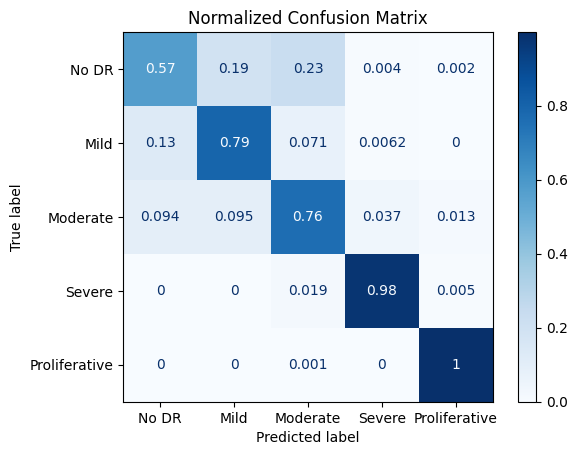


Per-class accuracy:
- No DR: 0.5710 (571/1000)
- Mild: 0.7940 (771/971)
- Moderate: 0.7610 (761/1000)
- Severe: 0.9760 (976/1000)
- Proliferative: 0.9990 (999/1000)


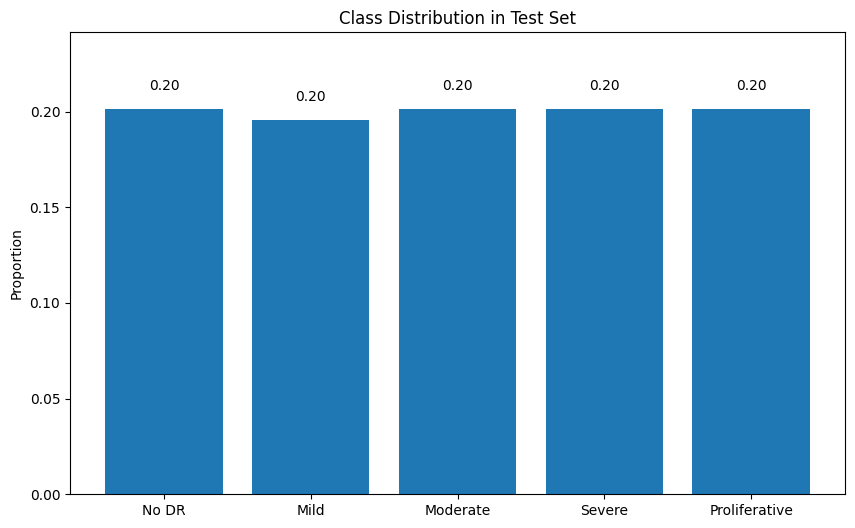


Potential systematic confusions (threshold > 0.2):
- No DR→Moderate: 0.2340


In [37]:
# Example usage
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Apply GradCAM to understand a specific prediction
pred_class, confidence, heatmap = apply_gradcam(model, "/content/dataset/content/Diabetic_Balanced_Data/train/1/10996_right.jpeg", preprocess, device, class_names)

# Test model robustness with transformations
robustness_results = test_model_robustness(model, "/content/dataset/content/Diabetic_Balanced_Data/train/1/10996_right.jpeg", preprocess, device, class_names)

# Analyze potential biases across the test set
bias_analysis = analyze_model_bias(model, test_loader, device, class_names)

In [ ]:
# Save the model weights to a file
torch.save(model.state_dict(), '/content/model_weights.pth')

# To save both model weights and optimizer state (useful for resuming training later)
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict()
}, '/content/checkpoint.pth')

In [ ]:
from google.colab import files

# Download just the model weights
files.download('/content/model_weights.pth')

# Or download the full checkpoint
files.download('/content/checkpoint.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>